In [1]:
!pip install klib

You should consider upgrading via the 'm:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import klib


%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"M:\Data Science\Data\Credit Card\credit_train.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

# Missing Value Plot

GridSpec(6, 6)

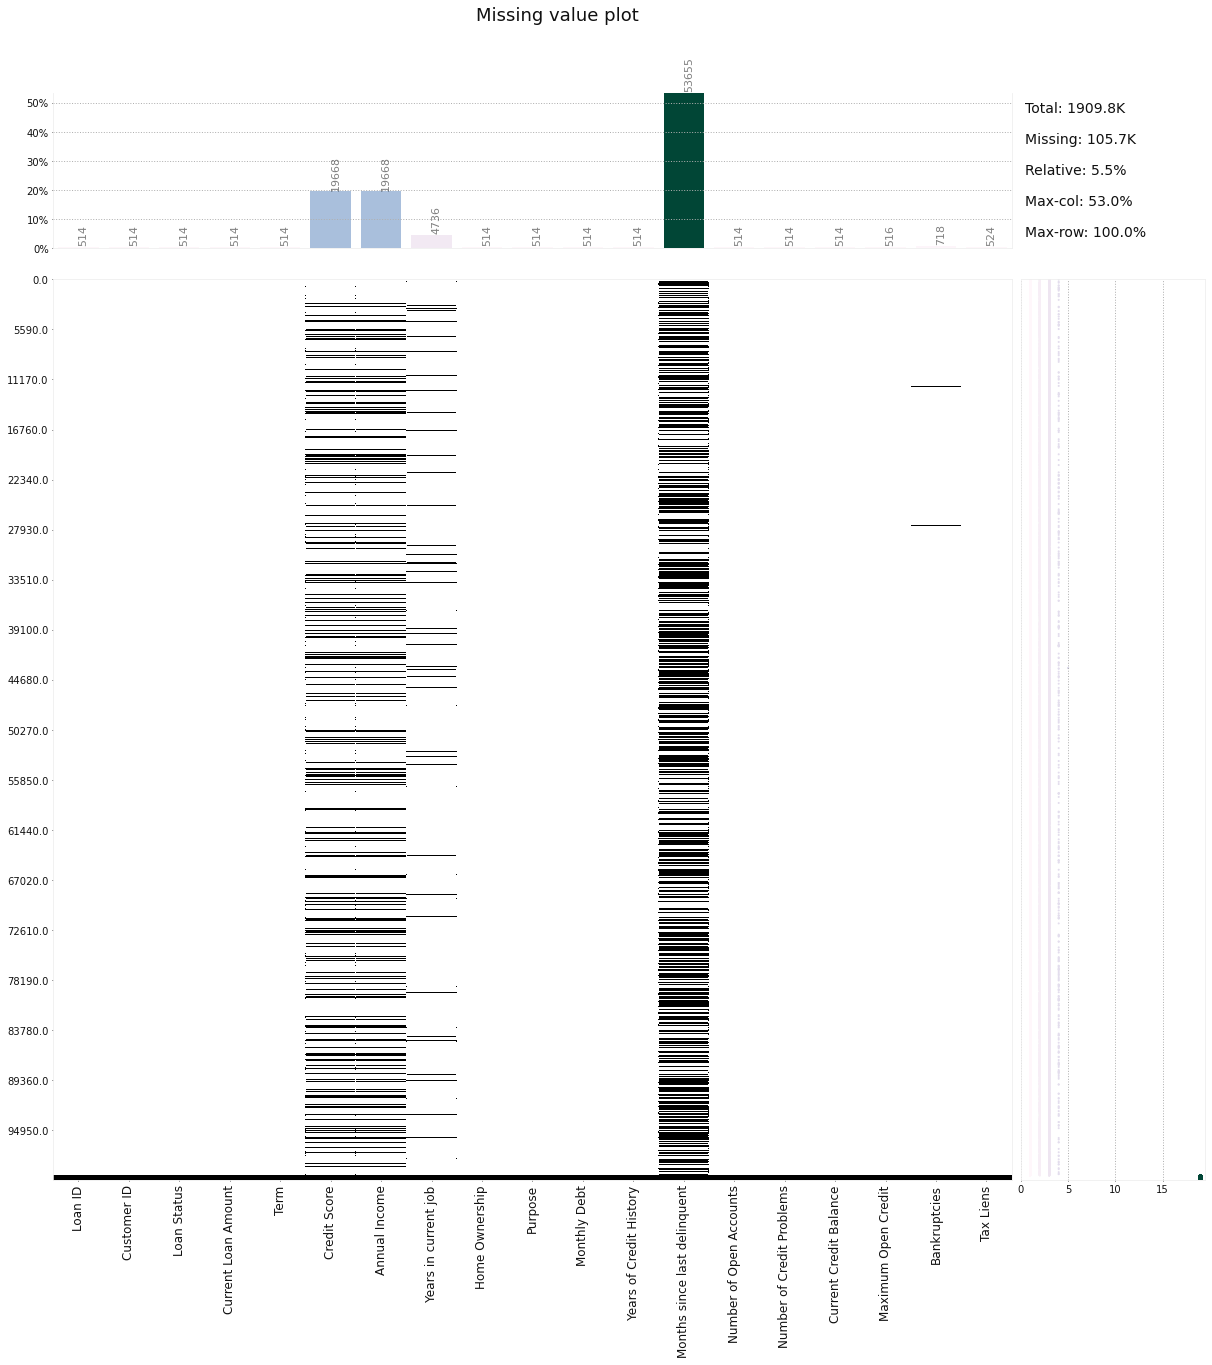

In [4]:
klib.missingval_plot(df)

# Data Cleaning

## Drops empty and single valued columns as well as empty and duplicate rows.

In [5]:
df_cleaned= klib.data_cleaning(df)

Long column names detected (>25 characters). Consider renaming thefollowing columns ['months_since_last_delinquent'].
Shape of cleaned data: (89785, 19)Remaining NAs: 90648

Changes:
Dropped rows: 10729
     of which 10215 duplicates. (Rows: [420, 1003, 1627, 1828, 2216, 2247, 2346, 2358, 2662, 2867, 2875, 2955, 3148, 3265, 3521, 3559, 3564, 3599, 3614, 3765, 3933, 4200, 4232, 4360, 4609, 4660, 4831, 4865, 4925, 5002, 5008, 5084, 5441, 5512, 5534, 5807, 5836, 5842, 5950, 5997, 6059, 6125, 6141, 6352, 6383, 6425, 6533, 6585, 6589, 6685, 6698, 6904, 6906, 6957, 7101, 7103, 7302, 7369, 7512, 7605, 7813, 7814, 7824, 7898, 7979, 8075, 8103, 8129, 8192, 8221, 8268, 8336, 8400, 8479, 8513, 8601, 8733, 8759, 8804, 8853, 8976, 9039, 9242, 9269, 9301, 9319, 9451, 9482, 9525, 9623, 9680, 9690, 9692, 9722, 9739, 9779, 9953, 9957, 9987, 10050, 10112, 10186, 10234, 10334, 10345, 10356, 10412, 10478, 10529, 10552, 10560, 10586, 10624, 10660, 10693, 10742, 10760, 10780, 10820, 10928, 10999, 11081, 111

In [6]:
df_cleaned.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   loan_id                       89785 non-null  string  
 1   customer_id                   89785 non-null  string  
 2   loan_status                   89785 non-null  category
 3   current_loan_amount           89785 non-null  float32 
 4   term                          89785 non-null  category
 5   credit_score                  70631 non-null  float32 
 6   annual_income                 70631 non-null  float32 
 7   years_in_current_job          85983 non-null  category
 8   home_ownership                89785 non-null  category
 9   purpose                       89785 non-null  category
 10  monthly_debt                  89785 non-null  float32 
 11  years_of_credit_history       89785 non-null  float32 
 12  months_since_last_delinquent  41448 non-null  

# Correlation Plot

### Display only positive correlation

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

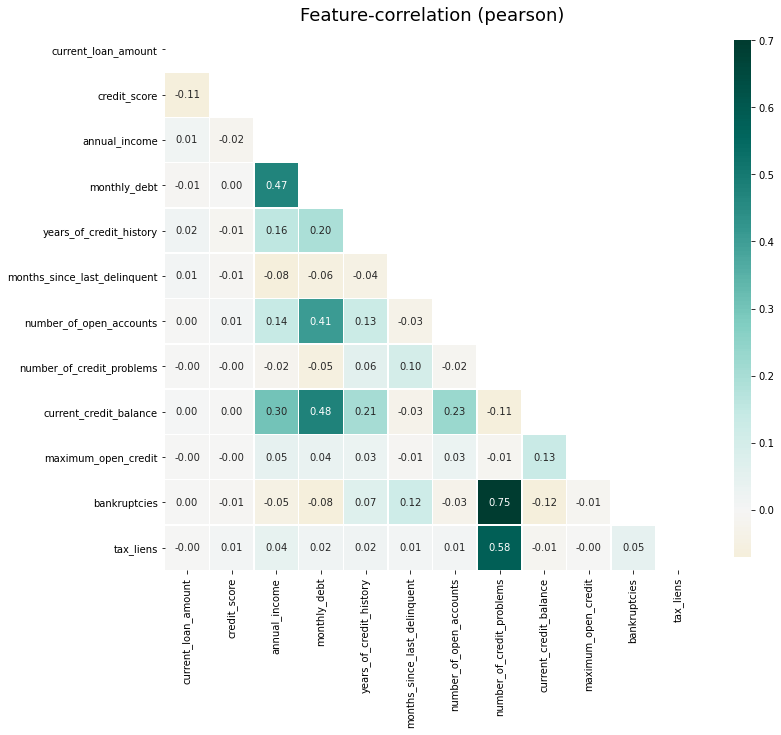

In [7]:
klib.corr_plot(df_cleaned)

### Display only positive correlation

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

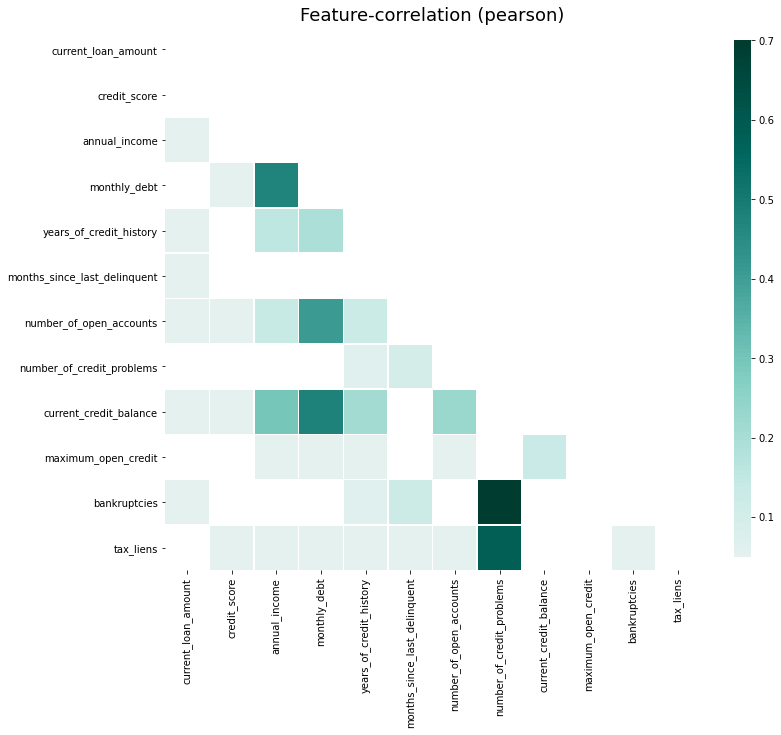

In [8]:
klib.corr_plot(df_cleaned,split='pos',annot=False)

### Display only negative Correlation

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

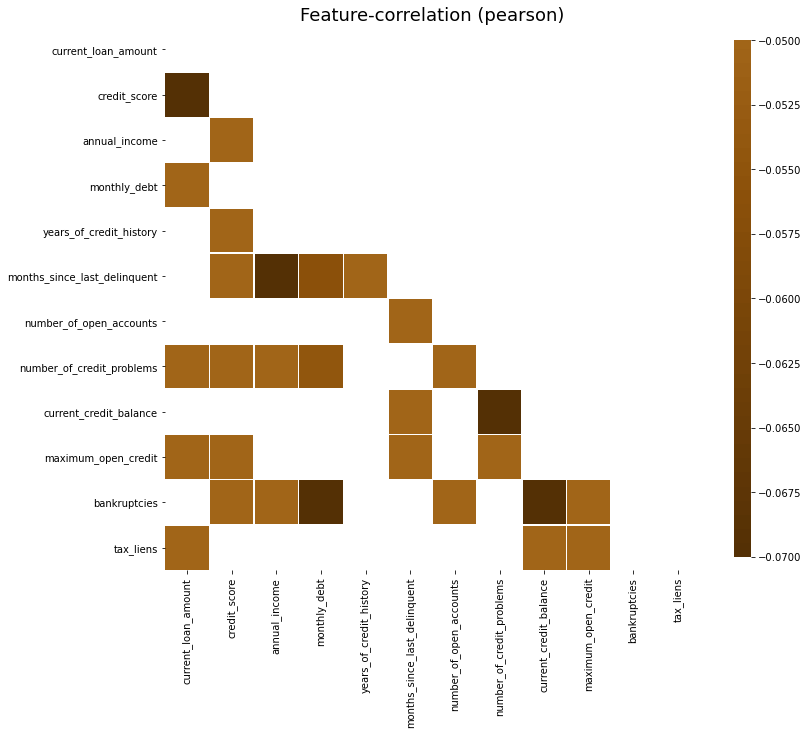

In [10]:
klib.corr_plot(df_cleaned,split='neg',annot=False)

### Categorical Data Plot

GridSpec(6, 7)

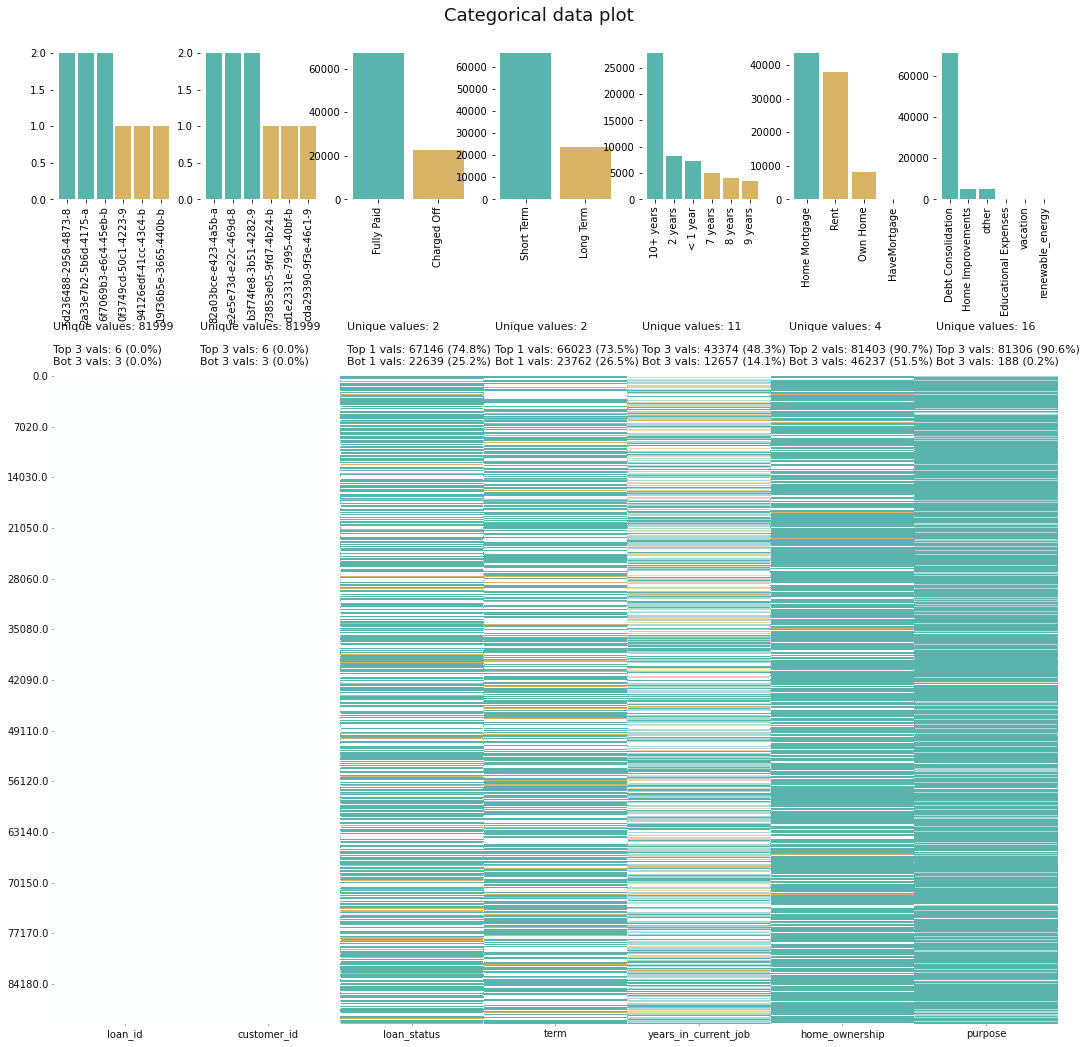

In [11]:
klib.cat_plot(df_cleaned)

### Display correlation with a target variable of interest



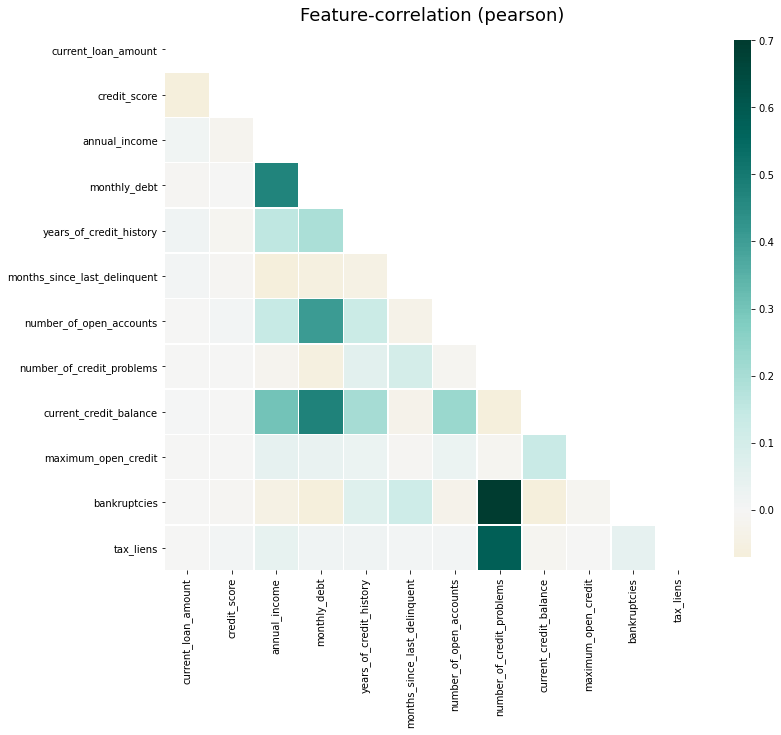

In [12]:
plot = klib.corr_plot(df_cleaned, annot=False, figsize=(12,10))